In [36]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as py
from pandas.plotting import scatter_matrix
from sklearn import svm


In [2]:
telco = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print ("Check for missing values :  ", telco.isnull().sum().values.sum())
print ("\nSee count of unique values per column:\n",telco.nunique().sort_values(ascending=False))

Check for missing values :   0

See count of unique values per column:
 customerID          7043
TotalCharges        6531
MonthlyCharges      1585
tenure                73
PaymentMethod          4
DeviceProtection       3
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PhoneService           2
PaperlessBilling       2
Dependents             2
Partner                2
SeniorCitizen          2
gender                 2
Churn                  2
dtype: int64


In [8]:
telco[telco["TotalCharges"] == " "].customerID

488     4472-LVYGI
753     3115-CZMZD
936     5709-LVOEQ
1082    4367-NUYAO
1340    1371-DWPAZ
3331    7644-OMVMY
3826    3213-VVOLG
4380    2520-SGTTA
5218    2923-ARZLG
6670    4075-WKNIU
6754    2775-SEFEE
Name: customerID, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5aa48af3c8>,
      dtype=object)

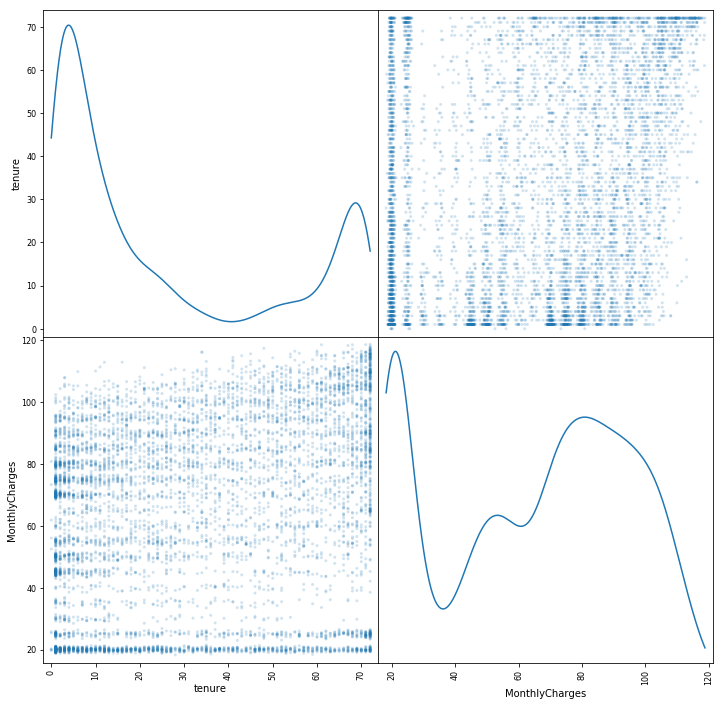

In [29]:
scatter_matrix(telco[["Churn","tenure","MonthlyCharges"]], alpha=0.2,figsize=(12,12), diagonal='kde')

In [40]:
correlation = telco.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

[[1.         0.01656688 0.22017334]
 [0.01656688 1.         0.24789986]
 [0.22017334 0.24789986 1.        ]]
